<a href="https://colab.research.google.com/github/RuwaAbey/Finaly_Year_Project_G09/blob/main/Heatmap_plot_for_collective_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.6.0+cu124
True
Tesla T4


In [ ]:

!pip install mmcv==1.5.0
!pip install fvcore

In [ ]:

import mmcv
print(mmcv.__version__)


1.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

%cd /content/drive/My\ Drive/G_09

/content/drive/My Drive/G_09


In [ ]:

!git clone https://github.com/kennymckormick/pyskl.git

fatal: destination path 'pyskl' already exists and is not an empty directory.


In [ ]:

%cd /content/drive/My\ Drive/G_09/pyskl

/content/drive/My Drive/G_09/pyskl


In [ ]:
!pip uninstall numpy

!pip install "numpy<2"
import numpy
import pyskl
#import numpy as np

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [ ]:
import pickle

%cd /content/drive/MyDrive/

# Load the pickle file
with open( 'pose_results_activity.pkl', 'rb') as f:
    data = pickle.load(f)

# Check the top-level keys
print(data.keys())  # Should print: ['split', 'annotations']


/content/drive/MyDrive
dict_keys(['keypoint', 'keypoint_score', 'frame_dir', 'label', 'img_shape', 'original_shape', 'total_frames'])


In [ ]:
annos = data
print(annos)


{'keypoint': array([[[[234.94794, 145.05833],
         [238.96425, 141.04202],
         [234.94794, 141.04202],
         [251.01317, 141.04202],
         [234.94794, 143.05019],
         [265.07025, 167.14803],
         [234.94794, 165.13986],
         [277.11917, 197.27032],
         [230.93164, 195.26216],
         [275.111  , 223.37631],
         [220.89087, 219.36   ],
         [259.04578, 227.39262],
         [236.95609, 227.39262],
         [259.04578, 271.572  ],
         [234.94794, 271.572  ],
         [257.03763, 313.7432 ],
         [234.94794, 313.7432 ]]],


       [[[129.73827, 163.08287],
         [131.66637, 159.22665],
         [125.88205, 161.15475],
         [137.45068, 163.08287],
         [120.09774, 165.01097],
         [135.52257, 184.292  ],
         [120.09774, 186.22011],
         [135.52257, 207.42926],
         [122.02584, 217.06978],
         [147.0912 , 209.35736],
         [141.30688, 209.35736],
         [137.45068, 240.20703],
         [127.81016, 242.1

In [ ]:
keypoint_pipeline = [
    dict(type='PoseDecode'),
    dict(type='PoseCompact', hw_ratio=1., allow_imgpad=True),
    dict(type='Resize', scale=(-1, 64)),
    dict(type='CenterCrop', crop_size=64),
    dict(type='GeneratePoseTarget', with_kp=True, with_limb=False)
]

limb_pipeline = [
    dict(type='PoseDecode'),
    dict(type='PoseCompact', hw_ratio=1., allow_imgpad=True),
    dict(type='Resize', scale=(-1, 64)),
    dict(type='CenterCrop', crop_size=64),
    dict(type='GeneratePoseTarget', with_kp=False, with_limb=True)
]

from pyskl.datasets.pipelines import Compose
def get_pseudo_heatmap(anno, flag='keypoint'):
    assert flag in ['keypoint', 'limb']
    pipeline = Compose(keypoint_pipeline if flag == 'keypoint' else limb_pipeline)
    return pipeline(anno)['imgs']

def vis_heatmaps(heatmaps, channel=-1, ratio=8):
    # if channel is -1, draw all keypoints / limbs on the same map
    import matplotlib.cm as cm
    heatmaps = [x.transpose(1, 2, 0) for x in heatmaps]
    h, w, _ = heatmaps[0].shape
    newh, neww = int(h * ratio), int(w * ratio)

    if channel == -1:
        heatmaps = [np.max(x, axis=-1) for x in heatmaps]
    cmap = cm.viridis
    heatmaps = [(cmap(x)[..., :3] * 255).astype(np.uint8) for x in heatmaps]
    heatmaps = [cv2.resize(x, (neww, newh)) for x in heatmaps]
    return heatmaps

  if event.key is 'enter':



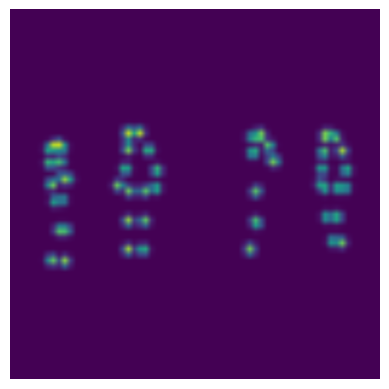

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your provided pose annotation dictionary
anno = annos

# Generate the heatmaps
heatmaps = get_pseudo_heatmap(anno, flag='keypoint')  # For keypoints
# heatmaps = get_pseudo_heatmap(anno, flag='limb')   # Uncomment for limb heatmaps

# Visualize the heatmaps
visualized_heatmaps = vis_heatmaps(heatmaps, channel=-1)

# Display the first heatmap
#plt.imshow(visualized_heatmaps[0])
#plt.axis('off')  # Hide axes
#plt.show()

for heatmap in visualized_heatmaps:
    plt.imshow(heatmap)
    plt.axis('off')  # Hide axes
    plt.show()